PROYECTO

Ingrese el numero de interaciones 5000
Indique a cada cuantos interacciones imprimiran los registros 1000





----------------------------------------------------------------
    Total de registros considerados
---------------------------------------------------------------- 

El total de registros luego de eliminar los nulos [ 1201 ]
Total de Registro para entreno [ 961 ]
Total de Registro para pruebas [ 240 ]


----------------------------------------------------------------
Calculos generales
----------------------------------------------------------------
  Variable      Media  ValorMax  ValorMin  DesviacionStan
0        Y  181002.57  755000.0   34900.0        83330.87
1       X1       6.12      10.0       1.0            1.42
2       X2    1155.83    3138.0     334.0          372.53
3       X3       6.50      14.0       2.0            1.62
4       X4    1970.64    2010.0    1875.0           31.53
5       X5      69.96     313.0      21.0           23.47
 

 Generacion de  Histrogramas....


----------------------------------------------------------------
    Correlacion de Variables
---

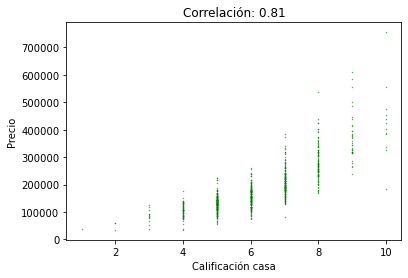

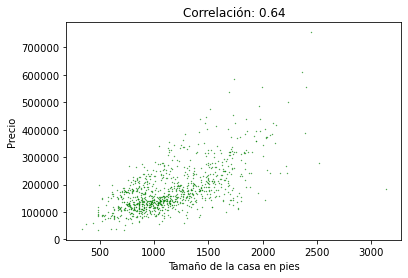

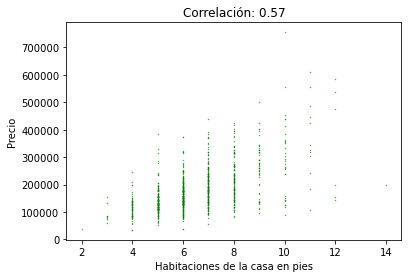

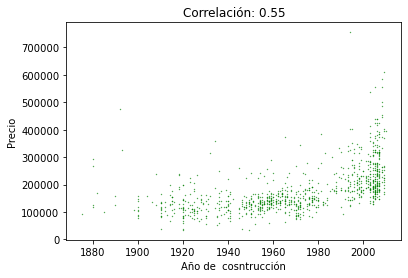

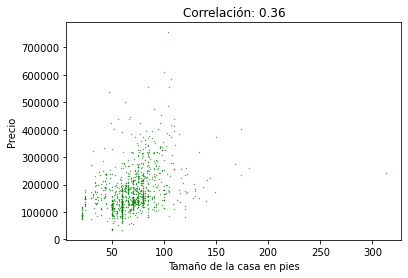


----------------------------------------------------------------
    Impresión de interaciones
---------------------------------------------------------------- 

Scalar o learning rate utilizado : [0.01]
Interación: 1
parametros Beta 1: 1
parametros Beta 0: 1
Error[3.97031917e+10]
___________________________________________________
Interación: 1000
parametros Beta 1: 36688.0
parametros Beta 0: -40240.0
Error[2.65087684e+09]
___________________________________________________
Interación: 2000
parametros Beta 1: 40926.0
parametros Beta 0: -67555.0
Error[2.49487275e+09]
___________________________________________________
Interación: 3000
parametros Beta 1: 43503.0
parametros Beta 0: -84171.0
Error[2.4371231e+09]
___________________________________________________
Interación: 4000
parametros Beta 1: 45072.0
parametros Beta 0: -94280.0
Error[2.41573726e+09]
___________________________________________________
Interación: 5000
parametros Beta 1: 46027.0
parametros Beta 0: -100428.0
Error[2.4

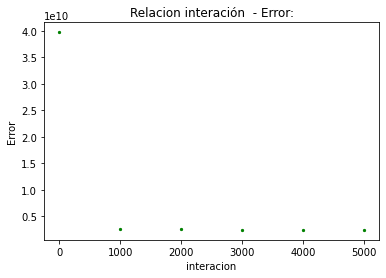


----------------------------------------------------------------
    Graficas 
---------------------------------------------------------------- 



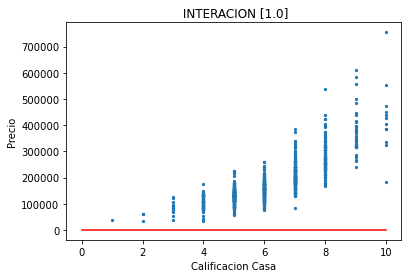

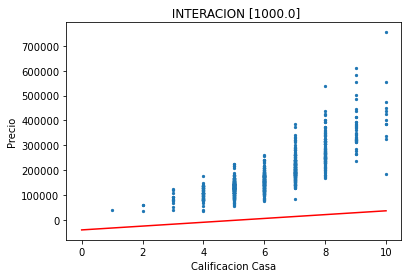

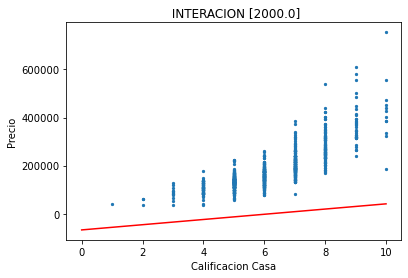

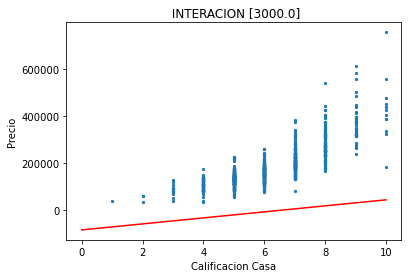

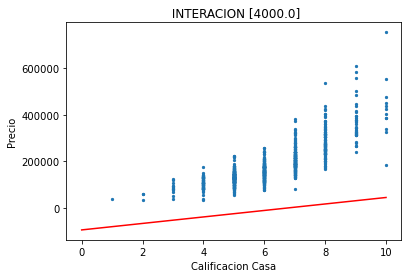

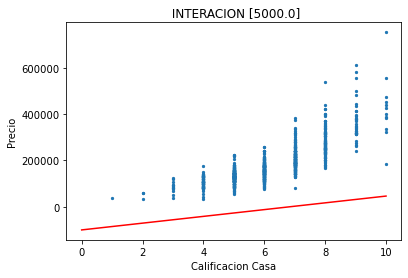



----------------------------------------------------------------
Comparación de modelos 
------------------------------------------------------------------

Modelos a utilizar:
--------------------------

     Modelo       BetaUno       BetaCero
0  Generado  46027.000000 -100428.000000
1     SKLEA  47513.214989 -110009.696594


----------------------------------------------------------------
Operaciones de los primero 10 regigistros
------------------------------------------------------------------

    YGenerado       YSklearn       Promedio
0    368216.0  380105.719914  374160.859957
1    322189.0  332592.504925  327390.752462
2    368216.0  380105.719914  374160.859957
3    368216.0  380105.719914  374160.859957
4    414243.0  427618.934903  420930.967452
5    276162.0  285079.289935  280620.644968
6    414243.0  427618.934903  420930.967452
8    368216.0  380105.719914  374160.859957
9    276162.0  285079.289935  280620.644968
10   276162.0  285079.289935  280620.644968





In [4]:
import  pandas  as pd
import  numpy  as  np
import  math as  mt
import  matplotlib.pyplot as plt
import  seaborn as  sns

from sklearn  import linear_model  

class  Regresion():
    
    datos=[] 
    egistros=[]
    
    def __int__(self):
       pass

    ##analizar si debemos de quita todas la variables  con  
    def lecturaArchivo(self):     
       ##lectura de arhcio 
       data = pd.DataFrame(np.load('data.npy'))                
       #Se el cambia el nombre a as columnas 
       data.rename(columns={0:'Precio',1:'Calificacion',2:'Tamaño',3:'Habitaciones',4:'Año',5:'Distancia'}, inplace=True ) 
       return data


    ##funcion para obtener el data set requerido entreno 80% o pruebas  20%  
    def Dataset(self, tdato,data): 
      
        Registros=round(len(data)*0.8)
         
        print  ("----------------------------------------------------------------")
        print ("    Total de registros considerados") 
        print  ("---------------------------------------------------------------- \n")
        print  ("El total de registros luego de eliminar los nulos [ " +str(len(data))+" ]") 
        print  ("Total de Registro para entreno [ " +str(Registros) + " ]" )         
        print  ("Total de Registro para pruebas [ " +str(len(data)-Registros) + " ]" ) 
        
        if tdato=='Entreno':           
           resultado =  data[:Registros]           
        else:
            resultado =  data[Registros:]
   
        return    resultado     
    
   
    def CalculoGenerales(self, Registros):
        long=len(Registros)
        Y1 =  np.array(Registros['Precio']).reshape(long,1)
        X1 =  np.array(Registros['Calificacion']).reshape(long,1)
        X2 =  np.array(Registros['Tamaño']).reshape(long,1)    
        X3 =  np.array(Registros['Habitaciones']).reshape(long,1)
        X4 =  np.array(Registros['Año']).reshape(long,1)
        X5 =  np.array(Registros['Distancia']).reshape(long,1)
    
        ##Media variables
        MY1= round(Y1.mean(),2)
        MX1= round(X1.mean(),2)
        MX2= round(X2.mean(),2)
        MX3= round(X3.mean(),2)
        MX4= round(X4.mean(),2)
        MX5= round(X5.mean(),2)

        #Valores MAximos
        MaxY1=np.amax(Y1)
        MaxX1= np.amax(X1)
        MaxX2= np.amax(X2)
        MaxX3= np.amax(X3)
        MaxX4= np.amax(X4)
        MaxX5= np.amax(X5)

        #Valores minimos 
        MinY1=np.amin(Y1)
        MinX1= np.amin(X1)
        MinX2= np.amin(X2)
        MinX3= np.amin(X3)
        MinX4= np.amin(X4)
        MinX5= np.amin(X5)
        
        #Desviacion estandar 
        DesY1= round(np.std(Y1),2)
        DesX1= round(np.std(X1),2)
        DesX2= round(np.std(X2),2)
        DesX3= round(np.std(X3),2)
        DesX4= round(np.std(X4),2)
        DesX5= round(np.std(X5),2)
        
        CalculosGe= pd.DataFrame(  {"Variable":["Y","X1","X2","X3","X4","X5"],
                            "Media":[MY1,MX1,MX2,MX3,MX4,MX5],
                            "ValorMax": [MaxY1,MaxX1,MaxX2,MaxX3,MaxX4,MaxX5],
                            "ValorMin": [MinY1,MinX1,MinX2,MinX3,MinX4,MinX5],
                            "DesviacionStan": [DesY1,DesX1,DesX2,DesX3,DesX4,DesX5]
                            })
        
        print  ("----------------------------------------------------------------")
        print ("Calculos generales")
        print  ("----------------------------------------------------------------")
        print (CalculosGe)
            
        
    def CoeficienteCorrelacion(self, data):
                
        Y1X1= data[['Precio','Calificacion']]    
        Y1X2= data[['Precio','Tamaño']]
        Y1X3= data[['Precio','Habitaciones']]
        Y1X4= data[['Precio','Año']]
        Y1X5= data[['Precio','Distancia']]        
        CoCalifi= pd.DataFrame( Y1X1.corr())
        CoCalida= pd.DataFrame( Y1X2.corr())
        CoHab=    pd.DataFrame( Y1X3.corr())
        CoAños=   pd.DataFrame( Y1X4.corr())
        CoDist=   pd.DataFrame( Y1X5.corr())
        
        CoCalifi=   round(CoCalifi.loc['Precio','Calificacion'],2)
        CoCalida=   round(CoCalida.loc['Precio','Tamaño'],2)
        CoHab=      round(CoHab.loc['Precio','Habitaciones'],2)
        CoAños=     round(CoAños.loc['Precio','Año'],2)
        CoDist=     round(CoDist.loc['Precio','Distancia'],2)
        
        print  ("----------------------------------------------------------------")
        print ("    Correlacion de Variables") 
        print  ("---------------------------------------------------------------- \n")
        Correlacion = pd.DataFrame({'Variable':['Calificacion','Tamaño','Habitaciones',
                                                'Año','Distancia'],
                                    "CorrelacionPrecio":[CoCalifi,CoCalida,CoHab,
                                         CoAños,CoDist]} )
        print(Correlacion)
             
        
        indiceMAx= Correlacion['CorrelacionPrecio'].idxmax()
        
        Variable =Correlacion.loc[indiceMAx]['Variable']
        CorrVar  =Correlacion.loc[indiceMAx]['CorrelacionPrecio']
        
        print("\n")
        print ("La variable con mayor correlacion es" )
        print (str(Variable) + " con correlacion: " +str(CorrVar))
        print ("___________________________________________________\n")  
       
        
        print  ("----------------------------------------------------------------")
        print ("    Graficas de correlacion") 
        print  ("---------------------------------------------------------------- \n")
        
        plt.scatter(data['Calificacion'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[0]['CorrelacionPrecio']))
        plt.xlabel('Calificación casa')
        plt.ylabel('Precio')
        plt.show()
        
        plt.scatter(data['Tamaño'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[1]['CorrelacionPrecio']))
        plt.xlabel('Tamaño de la casa en pies')
        plt.ylabel('Precio')
        plt.show()
        
        plt.scatter(data['Habitaciones'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[2]['CorrelacionPrecio']))
        plt.xlabel('Habitaciones de la casa en pies')
        plt.ylabel('Precio')
        plt.show()
                
        plt.scatter(data['Año'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[3]['CorrelacionPrecio']))
        plt.xlabel('Año de  cosntrucción')
        plt.ylabel('Precio')
        plt.show()
                
        plt.scatter(data['Distancia'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[4]['CorrelacionPrecio']))
        plt.xlabel('Tamaño de la casa en pies')
        plt.ylabel('Precio')
        plt.show()
        
        return  str(Variable)
    
        
    def  Entreno(self, x, y , epochs, impError):                 
        Y = np.transpose(np.array([y])) #var dependiente 
        X=np.transpose(np.array([x])) #convieto las columna a filas         
        X=np.column_stack((X, np.ones((len(X),1))))
        bCero = 1 #intercepcion  b
        bUno =  1 #pendiente  m
        tasa =  0.01
             
        print  ("\n----------------------------------------------------------------")
        print ("    Impresión de interaciones") 
        print  ("---------------------------------------------------------------- \n")    
            
        parametro =  np.array ([bUno,bCero])
        
        res=pd.DataFrame(columns=['Interacion','BetaUno','BetaCero','Error' ])
    
        count = 0;                
        for  i in range(epochs):                               
           count =count +1;
           yEst= (np.dot (X,parametro)).round()
           
           yEst=np.transpose(np.array([yEst]))
           sError = ((sum((Y-yEst)*(Y-yEst)))/(len(Y))).round()
           
           Gradiente= ((sum((yEst - Y)*X))/(len(Y))).round()
                                               
           if count==impError or  i==0  or  impError==1 or  i==epochs-1:
               if i==0:
                   print ("Scalar o learning rate utilizado : ["+str(tasa) + "]" )
                   count=1
               else:
                   count=0
               
               print ("Interación: " +str(i+1)) 
               print ("parametros Beta 1: " + str(parametro[0])) 
               print ("parametros Beta 0: " + str(parametro[1])) 
               #print ("Gradiente " + str (Gradiente))
               print  ("Error" + str (sError))
               print ("___________________________________________________") 
               
               res.loc[i]=[i+1,round((parametro[0]),2),round((parametro[1]),2),sError[0]] 
           
           parametroA=parametro    
           parametro= (parametroA- tasa *  Gradiente).round()  
           
        return res
    
    def RelacionInteracionError(self, interacion, error):    
        
        print  ("\n----------------------------------------------------------------")
        print ("    Graficas de la relacion de interaciones - error") 
        print  ("---------------------------------------------------------------- \n")
        
        plt.scatter(interacion,error,s=5, c='green')
        plt.title( "Relacion interación  - Error:")
        plt.xlabel('interacion')
        plt.ylabel('Error')
        plt.show()
        
        
    def  EvolucionModelo(self,  X,Y, modelo):
        print  ("\n----------------------------------------------------------------")
        print ("    Graficas ") 
        print  ("---------------------------------------------------------------- \n")
        
        for  i in  modelo['Interacion'].index.tolist():
            plt.scatter(X,Y,s=5, )
            plt.plot([0,10],[modelo.loc[i,"BetaCero"],modelo.loc[i,"BetaUno"]],color='r')
            plt.title(" INTERACION ["+str(modelo.loc[i,"Interacion"]) +"]" )
            plt.xlabel('Calificacion Casa')
            plt.ylabel('Precio')
            plt.show()
        
        
            
    def  EntrenoSklean(self,  X,Y):
       
        v = pd.DataFrame({'Precio':Y,'Estado':X})
        algoritmo = linear_model.LinearRegression()
        algoritmo.fit(v[['Estado']],v[['Precio']])
        BetaUno=algoritmo.coef_
        BetaCero=algoritmo.intercept_
        ModeloSklean = pd.DataFrame({'BetaU':BetaUno[0], 'BetaC':BetaCero})

        return  ModeloSklean
        
                    
    def  ComparacionModelos(self,  X,Y, Modelos):
        
        print  ("\n\n----------------------------------------------------------------")
        print ("Comparación de modelos ") 
        print  ("------------------------------------------------------------------\n")
        print ("Modelos a utilizar:")
        print  ("--------------------------\n")
        print  (Modelos)
       
        print  ("\n\n----------------------------------------------------------------")
        print  ("Operaciones de los primero 10 regigistros")
        print  ("------------------------------------------------------------------\n")
        YGenerado =  Modelos.iloc[0,1]*X + Modelos.iloc[0,1]
        YSklearn = Modelos.iloc[1,1]*X + Modelos.iloc[1,1]
        Promedio = (Modelos.iloc[0,1]*X + Modelos.iloc[0,1] +  Modelos.iloc[1,1]*X + Modelos.iloc[1,1]) /2
        
        
        res=pd.DataFrame({'YGenerado':YGenerado, 'YSklearn':YSklearn, 'Promedio':Promedio})
        print (res.head(10))
        
        
    def  Pruebas(self,  x,y, Modelos):        
        Y = np.transpose(np.array([y])) #var dependiente 
        X=np.transpose(np.array([x])) #convieto las columna a filas         
        X=np.column_stack((X, np.ones((len(X),1))))
 
         
        

Interaciones=input ("Ingrese el numero de interaciones")
impIntera=input ("Indique a cada cuantos interacciones imprimiran los registros")
epochs= int(Interaciones)
ImpError = int(impIntera)
        
        
reg = Regresion()
data=reg.lecturaArchivo()
data.drop(data[data.Distancia.isnull()].index, inplace=True)

print ("\n\n")
Registros=reg.Dataset("Entreno", data)

print ("\n")
reg.CalculoGenerales(Registros)


print (" \n\n Generacion de  Histrogramas....")
#reg.Histogramas(Registros)


print ("\n")
Variable=reg.CoeficienteCorrelacion(Registros)
             
X=Registros[Variable]
Y=Registros['Precio']

ModeloGenerado=pd.DataFrame()
ModeloGenerado=reg.Entreno(X,Y,epochs, ImpError)
reg.RelacionInteracionError(ModeloGenerado['Interacion'],ModeloGenerado['Error'])
reg.EvolucionModelo (X,Y,ModeloGenerado)
ModeloSklean=reg.EntrenoSklean(X,Y)

Modelos = pd.DataFrame({"Modelo":['Generado','SKLEA'],
                   "BetaUno":[ModeloGenerado.iloc[-1,1],ModeloSklean.iloc[0,0]],
                   "BetaCero":[ModeloGenerado.iloc[-1,2],ModeloSklean.iloc[0,1]]
})


#Llamado la fnci
#Para cada variable independiente x elegida, crear una función que usando el modelo
reg.ComparacionModelos(X,Y,Modelos)


##Llamado de funcion  que permite  obtener el  20% datos para las pruebas
##Usando el 20% de los datos de validacion, aplicamos los modelos predictivos para

print  ("\n\n")
##Registros=reg.Dataset("Pruebas", data)

##X=Registros[Variable]
##Y=Registros['Precio']

#reg.Pruebas(X,Y, Modelos)

